# Report

I've run the Individual Effects Pipeline on the following datasets:

1. Batches A, B, C, D, E of the Huntington Dataset, each batch separately. I refer to these by the batch name.
2. All batches of the Huntington Dataset, A + B + C + D + E, taken together. I do not perform any batch correction. I refer to this as "ALL".
3. DM1 Muscle. I refer to this as DM1Muscle.
4. DM1 Blood. I refer to this as DM1.

The workflow of the pipeline is:

1. Run simple linear regression on RMA normalised data. I refer to this as "NON_ADJUSTED"
2. Run simple linear regression on RMA + Quantile Normalised data. I refer to this as "QA"
3. Run simple linear regression on RMA + Mean Normalised data. I refer to this as "MEAN_ADJUSTED"
4. Carry out Benjamini-Hochberg on each of the sets of p-values obtained from steps 1, 2, 3.
5. Run Disease Specific Effect pipeline for top 8, 16, 32, 64, 128, 256 and 512 genes, on each QA dataset.

In the end I get several sets of ordered pairs of the form (FDR adjusted p-value, gene). By abuse of notation, I'll refer to FDR adjusted p-values as p-values.

I present the results in the following ways:

1. I compare the order of the lowest NON_ADJUSTED, QA and MEAN_ADJUSTED p-values. The hope here is that QA and MEAN_ADJUSTED will give us much more significant results than NON_ADJUSTED, therefore showing that RMA is a suboptimal normalisation algorithm.
2. I show the lowest 10 p-values for each QA dataset.
3. I show to what extent the genes corresponding to the lowest 10 p-values overlap between the huntigtion and DM datasets separately. The hope here is that we will get signinificant overlap (maybe less so in the DM dataset, as we compare 2 different tissues).
4. I present the ratio of improved p-values for each of DSE8, ... , DSE512 (in power of 2 steps). The hope here is that the method works most of the time, i.e. the ratio of improved p-values is more than 0.5.

There are also additional, quantitative observations which I'd like to make.

1. All p-values of the datasets C, D, E and ALL (which is  majority of the huntington datasets) have very high p-values, almost always > 0.99, and regardless of normalisation. But it's not fair to compare p-values, say, between ALL and C, because ALL is a much larger dataset. I'd like to use a different statistical tool, but I'm not sure how to apply correction for multiple hypotheses testing in a meaningful way with, say, confidence intervals.
2. FDR completely murders p-values in ALL dataset. There's no wander that the poor guys behind the study decided to go with a "reverse model", i.e. using gene expression to explain the allele length.
3. The "reverse model" might actually work really well with our data -- certainly we have more significant correlation than the Huntington's people.

# TODO

1. check PCA too see if we can get batch B somehow stand out.
2. Do a heatmap of microarrays.
3. Run a simulation to win/loose 1 GBP from Simon.
4. Make a reverse model.

In [5]:
import json
results = {}

with open("CEL_files/subset/results") as f:
    results["SEPSIS"]= json.load(f)

In [6]:
GENDER = results["SEPSIS"]["GENDER"]

In [7]:
letters = [key for key in results]
labels = ["QA", "NON_ADJUSTED", "MEAN_ADJUSTED"]

In [8]:
letters

['SEPSIS']

# The order of the lowest p-values

In [9]:
rowsOrder = []
for letter in results:
    allR = [results[letter][label][0] for label in labels]
    s = sorted([[i[0], j] for i, j in zip(allR, labels)])
    row = [" < ".join([j for i, j in s])] + [i for i, j in allR]
    rowsOrder.append(row)

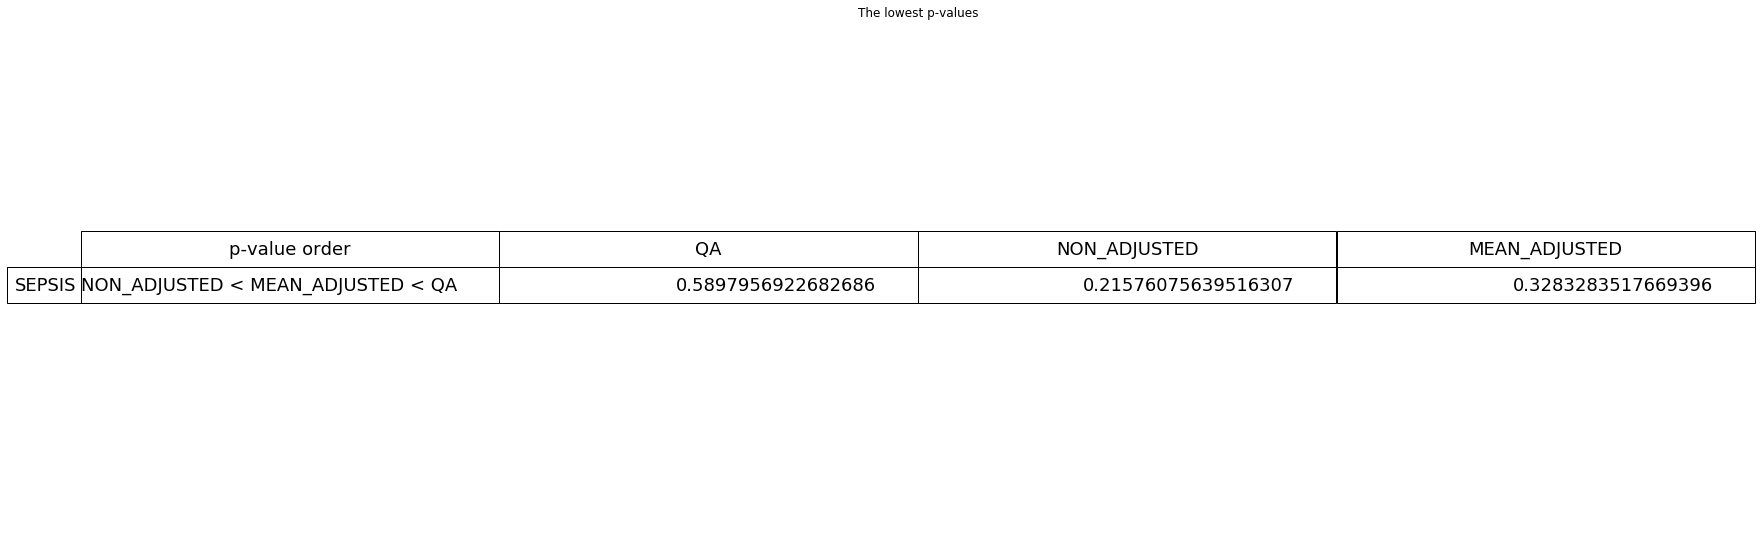

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

fig, axs = plt.subplots(1, 1)
clust_data = rowsOrder
collabel=("p-value order", *labels)
axs.axis('tight')
axs.axis('off')
table = axs.table(cellText=clust_data, colLabels=collabel, rowLabels=letters, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(2, 3)
axs.set_title("The lowest p-values")
plt.show()

In [24]:
results

{'SEPSIS': {'GENDER': ['M', 'M', 'M', 'M', 'M', 'M'],
  'MEAN_ADJUSTED': [[0.3283283517669396, '3236448'],
   [0.3283283517669396, '2378369'],
   [0.6050978682245413, '3042756'],
   [0.6050978682245413, '2831519'],
   [0.6050978682245413, '3443913'],
   [0.6050978682245413, '2412834'],
   [0.6050978682245413, '3119945'],
   [0.6050978682245413, '3496916'],
   [0.6050978682245413, '3662417'],
   [0.6050978682245413, '3957666'],
   [0.6050978682245413, '2356181'],
   [0.6050978682245413, '3275386'],
   [0.6050978682245413, '3529508'],
   [0.6050978682245413, '3851826'],
   [0.6050978682245413, '3217077'],
   [0.6050978682245413, '2469157'],
   [0.6050978682245413, '3726691'],
   [0.6050978682245413, '2780143'],
   [0.6050978682245413, '3833992'],
   [0.6050978682245413, '3503747'],
   [0.6050978682245413, '3195296'],
   [0.6050978682245413, '3676676'],
   [0.6050978682245413, '2953408'],
   [0.6050978682245413, '3475794'],
   [0.6050978682245413, '3571542'],
   [0.6050978682245413, '2901

# 10 lowest p-values

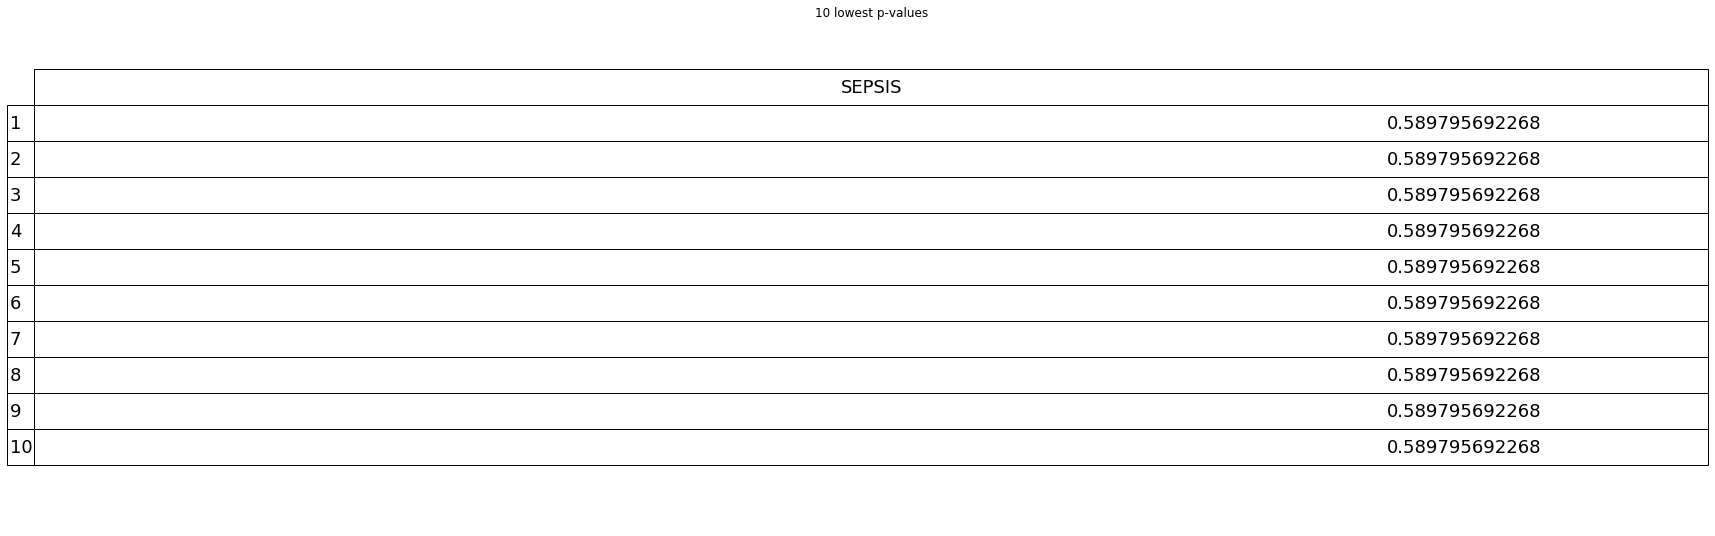

In [12]:
lowestPRows = [] #[[results[letter][label][:10] for label in labels]]
lowestGRows = []
size = 10
for letter in letters:
    r = results[letter]["QA"][:size]
    lowestPRows.append([i for i, j in r])
    lowestGRows.append([j for i, j in r])

fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')
table = axs.table(cellText=np.transpose(lowestPRows), colLabels=letters, rowLabels=range(1, size + 1), loc='center')
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(2, 3)
axs.set_title("10 lowest p-values")
plt.show()

# Unadjusted p-values per-dataset

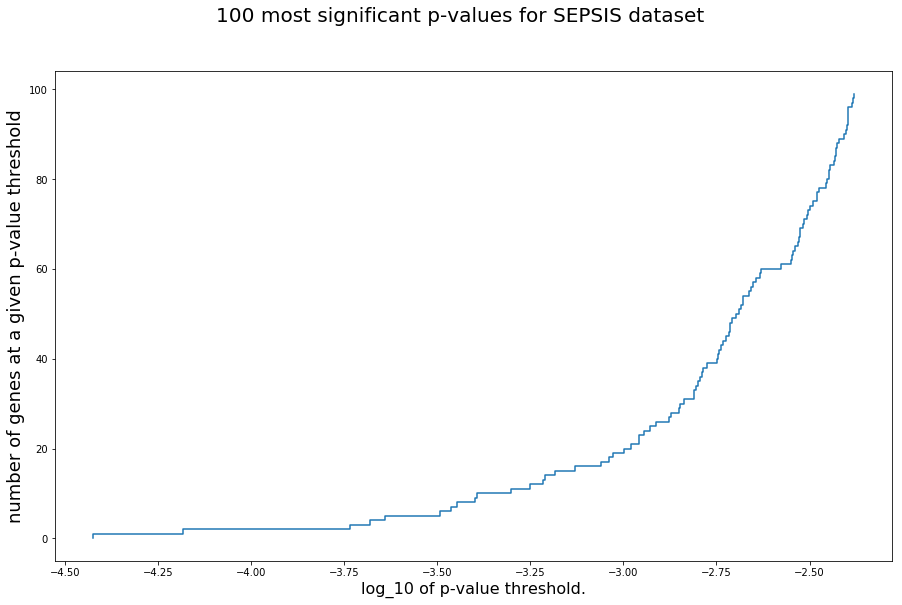

In [14]:
import math
no = 100
for dataset in ["SEPSIS"]:
    values = []
    for i, j in sorted(results[dataset]["QA_P"][:no]):
        values.append(math.log(i, 10))
    fig = plt.figure()
    plt.step(values, np.arange(len(values)))
    fig.suptitle(str(no) + ' most significant p-values for ' + dataset + " dataset", fontsize=20)
    plt.ylabel('number of genes at a given p-value threshold', fontsize=18)
    plt.xlabel('log_10 of p-value threshold.', fontsize=16)
    plt.show()

# Overlap of genes with the lowest 10 p-values (huntington)

# DSE  8, 16, 32, 64, 128, 256 and 512

In [15]:
rowCols = []
for letter in letters:
    rowCols.append(results[letter]["results"])

In [16]:
rowCols

[[0.25, 0.375, 0.125, 0.59375, 0.40625, 0.46875, 0.5078125]]

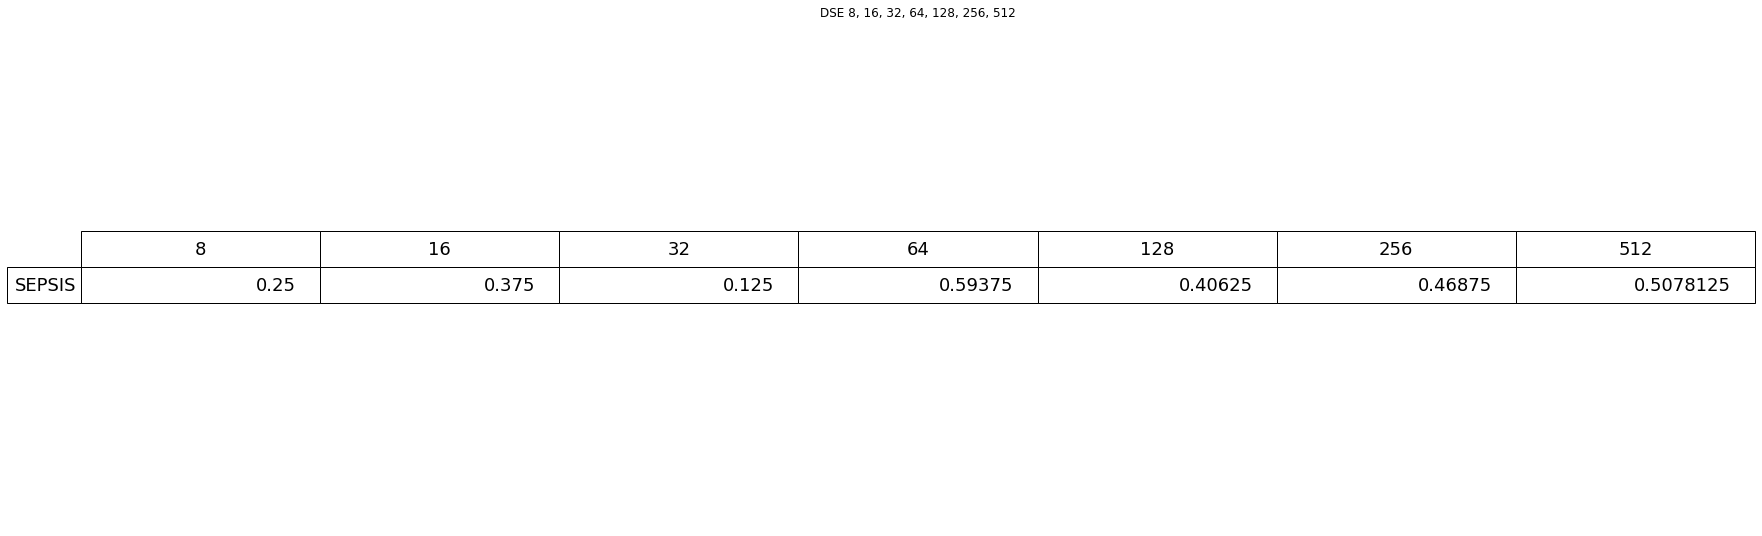

In [17]:
fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')
table = axs.table(cellText=rowCols, colLabels=[8, 16, 32, 64, 128, 256, 512], rowLabels=letters, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(2, 3)
_ = axs.set_title("DSE 8, 16, 32, 64, 128, 256, 512")

In [18]:
rowCols2 = []
for letter in letters:
    rowCols2.append(results[letter]["resultsRev"])

# Reverse DSE

Instead of subtracting the fudge factor we add it.

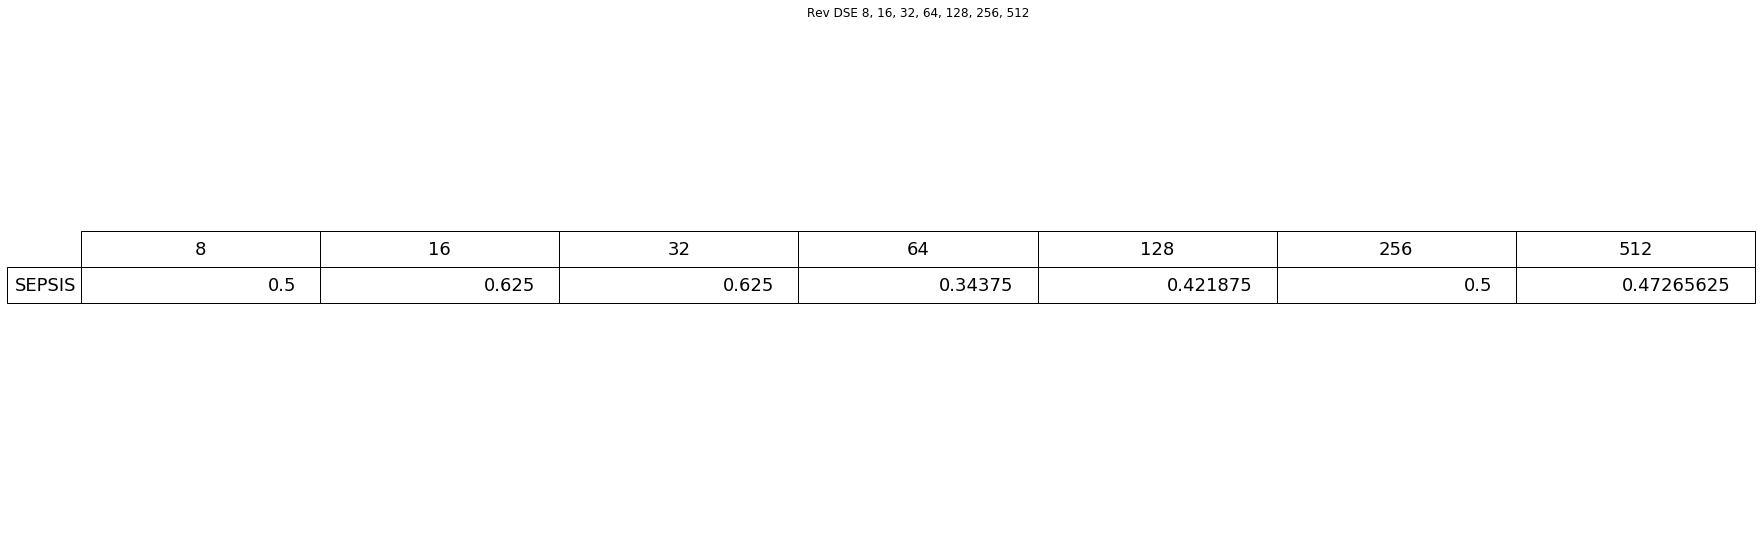

In [23]:
fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')
table = axs.table(cellText=rowCols2, colLabels=[8, 16, 32, 64, 128, 256, 512], rowLabels=letters, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(2, 3)
_ = axs.set_title("Rev DSE 8, 16, 32, 64, 128, 256, 512")